In [7]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
url = "../data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

# Apply Min / Max Scaling
def scaler(col_name):
    df[col_name] = (df[col_name]-df[col_name].min())/ (df[col_name].max()-df[col_name].min())

scaler_list =  [ 'side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value", "mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

for i in scaler_list:
    scaler(i)

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [10]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [11]:
# Fit the model
history = model.fit(
    X_train, y_train_5d, epochs=1000, batch_size=128,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6967 - acc: 0.4929 - val_loss: 0.6919 - val_acc: 0.5320
Epoch 2/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6896 - acc: 0.5481 - val_loss: 0.6910 - val_acc: 0.5328
Epoch 3/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6887 - acc: 0.5477 - val_loss: 0.6911 - val_acc: 0.5328
Epoch 4/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6886 - acc: 0.5477 - val_loss: 0.6912 - val_acc: 0.5328
Epoch 5/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6886 - acc: 0.5477 - val_loss: 0.6913 - val_acc: 0.5328
Epoch 6/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6886 - acc: 0.5477 - val_loss: 0.6913 - val_acc: 0.5328
Epoch 7/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6886 - acc: 0.5477 - val_loss: 0.691

27584/27584 [==============================] - 0s 9us/step - loss: 0.6823 - acc: 0.5663 - val_loss: 0.6871 - val_acc: 0.5481
Epoch 60/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6822 - acc: 0.5655 - val_loss: 0.6871 - val_acc: 0.5494
Epoch 61/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6822 - acc: 0.5654 - val_loss: 0.6870 - val_acc: 0.5502
Epoch 62/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6820 - acc: 0.5653 - val_loss: 0.6870 - val_acc: 0.5518
Epoch 63/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6820 - acc: 0.5663 - val_loss: 0.6869 - val_acc: 0.5498
Epoch 64/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6819 - acc: 0.5670 - val_loss: 0.6868 - val_acc: 0.5513
Epoch 65/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6818 - acc: 0.5672 - val_loss: 0.6868 - val_acc: 0.5498
Epoch 66/1000
27584/27584 [===========

Epoch 118/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6783 - acc: 0.5769 - val_loss: 0.6842 - val_acc: 0.5520
Epoch 119/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6783 - acc: 0.5762 - val_loss: 0.6842 - val_acc: 0.5544
Epoch 120/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6782 - acc: 0.5772 - val_loss: 0.6842 - val_acc: 0.5543
Epoch 121/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6782 - acc: 0.5765 - val_loss: 0.6843 - val_acc: 0.5597
Epoch 122/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6781 - acc: 0.5769 - val_loss: 0.6842 - val_acc: 0.5550
Epoch 123/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6781 - acc: 0.5761 - val_loss: 0.6841 - val_acc: 0.5537
Epoch 124/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6780 - acc: 0.5774 - val_loss: 0.6841 - val_acc: 0.5544
Epoch 125/1000
275

27584/27584 [==============================] - 0s 9us/step - loss: 0.6765 - acc: 0.5773 - val_loss: 0.6844 - val_acc: 0.5544
Epoch 177/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6765 - acc: 0.5767 - val_loss: 0.6844 - val_acc: 0.5543
Epoch 178/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6765 - acc: 0.5780 - val_loss: 0.6844 - val_acc: 0.5517
Epoch 179/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6764 - acc: 0.5765 - val_loss: 0.6847 - val_acc: 0.5571
Epoch 180/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6765 - acc: 0.5773 - val_loss: 0.6845 - val_acc: 0.5546
Epoch 181/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6764 - acc: 0.5765 - val_loss: 0.6846 - val_acc: 0.5556
Epoch 182/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6764 - acc: 0.5769 - val_loss: 0.6845 - val_acc: 0.5550
Epoch 183/1000
27584/27584 [======

27584/27584 [==============================] - 0s 9us/step - loss: 0.6759 - acc: 0.5773 - val_loss: 0.6846 - val_acc: 0.5552
Epoch 235/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6759 - acc: 0.5775 - val_loss: 0.6844 - val_acc: 0.5466
Epoch 236/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6759 - acc: 0.5766 - val_loss: 0.6844 - val_acc: 0.5511
Epoch 237/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6759 - acc: 0.5775 - val_loss: 0.6844 - val_acc: 0.5539
Epoch 238/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6759 - acc: 0.5773 - val_loss: 0.6843 - val_acc: 0.5497
Epoch 239/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6758 - acc: 0.5776 - val_loss: 0.6844 - val_acc: 0.5511
Epoch 240/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6759 - acc: 0.5772 - val_loss: 0.6844 - val_acc: 0.5511
Epoch 241/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 14us/step - loss: 0.6754 - acc: 0.5786 - val_loss: 0.6842 - val_acc: 0.5573
Epoch 293/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6754 - acc: 0.5772 - val_loss: 0.6841 - val_acc: 0.5534
Epoch 294/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6753 - acc: 0.5783 - val_loss: 0.6841 - val_acc: 0.5550
Epoch 295/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6753 - acc: 0.5782 - val_loss: 0.6841 - val_acc: 0.5576
Epoch 296/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6753 - acc: 0.5783 - val_loss: 0.6841 - val_acc: 0.5526
Epoch 297/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6753 - acc: 0.5784 - val_loss: 0.6841 - val_acc: 0.5489
Epoch 298/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6753 - acc: 0.5781 - val_loss: 0.6841 - val_acc: 0.5542
Epoch 299/1000
27584/27584 [

Epoch 350/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6749 - acc: 0.5775 - val_loss: 0.6839 - val_acc: 0.5485
Epoch 351/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6749 - acc: 0.5789 - val_loss: 0.6840 - val_acc: 0.5497
Epoch 352/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6749 - acc: 0.5790 - val_loss: 0.6839 - val_acc: 0.5515
Epoch 353/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6749 - acc: 0.5788 - val_loss: 0.6839 - val_acc: 0.5553
Epoch 354/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6749 - acc: 0.5784 - val_loss: 0.6838 - val_acc: 0.5559
Epoch 355/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6749 - acc: 0.5778 - val_loss: 0.6838 - val_acc: 0.5565
Epoch 356/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6748 - acc: 0.5767 - val_loss: 0.6840 - val_acc: 0.5584
Epoch 357/100

27584/27584 [==============================] - 0s 12us/step - loss: 0.6745 - acc: 0.5775 - val_loss: 0.6839 - val_acc: 0.5497
Epoch 409/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6745 - acc: 0.5779 - val_loss: 0.6837 - val_acc: 0.5486
Epoch 410/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6745 - acc: 0.5770 - val_loss: 0.6837 - val_acc: 0.5507
Epoch 411/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6745 - acc: 0.5769 - val_loss: 0.6838 - val_acc: 0.5497
Epoch 412/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6745 - acc: 0.5779 - val_loss: 0.6838 - val_acc: 0.5501
Epoch 413/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6745 - acc: 0.5775 - val_loss: 0.6838 - val_acc: 0.5511
Epoch 414/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6745 - acc: 0.5777 - val_loss: 0.6837 - val_acc: 0.5510
Epoch 415/1000
27584/27584 [

Epoch 466/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6742 - acc: 0.5770 - val_loss: 0.6835 - val_acc: 0.5494
Epoch 467/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6742 - acc: 0.5782 - val_loss: 0.6836 - val_acc: 0.5499
Epoch 468/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6743 - acc: 0.5769 - val_loss: 0.6836 - val_acc: 0.5494
Epoch 469/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6743 - acc: 0.5775 - val_loss: 0.6836 - val_acc: 0.5498
Epoch 470/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6742 - acc: 0.5763 - val_loss: 0.6839 - val_acc: 0.5489
Epoch 471/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6742 - acc: 0.5772 - val_loss: 0.6838 - val_acc: 0.5470
Epoch 472/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6742 - acc: 0.5782 - val_loss: 0.6835 - val_acc: 0.5514
Epoch 473/100

27584/27584 [==============================] - 0s 14us/step - loss: 0.6740 - acc: 0.5783 - val_loss: 0.6835 - val_acc: 0.5521
Epoch 525/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6740 - acc: 0.5793 - val_loss: 0.6836 - val_acc: 0.5517
Epoch 526/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6739 - acc: 0.5783 - val_loss: 0.6836 - val_acc: 0.5559
Epoch 527/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6741 - acc: 0.5786 - val_loss: 0.6835 - val_acc: 0.5511
Epoch 528/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6740 - acc: 0.5782 - val_loss: 0.6838 - val_acc: 0.5521
Epoch 529/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6740 - acc: 0.5781 - val_loss: 0.6834 - val_acc: 0.5556
Epoch 530/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6740 - acc: 0.5769 - val_loss: 0.6835 - val_acc: 0.5520
Epoch 531/1000
27584/27584 [

27584/27584 [==============================] - 1s 20us/step - loss: 0.6739 - acc: 0.5773 - val_loss: 0.6838 - val_acc: 0.5528
Epoch 583/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6738 - acc: 0.5780 - val_loss: 0.6838 - val_acc: 0.5534
Epoch 584/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6738 - acc: 0.5779 - val_loss: 0.6838 - val_acc: 0.5526
Epoch 585/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6738 - acc: 0.5778 - val_loss: 0.6838 - val_acc: 0.5534
Epoch 586/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6738 - acc: 0.5784 - val_loss: 0.6835 - val_acc: 0.5528
Epoch 587/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6738 - acc: 0.5778 - val_loss: 0.6838 - val_acc: 0.5528
Epoch 588/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6738 - acc: 0.5769 - val_loss: 0.6838 - val_acc: 0.5530
Epoch 589/1000
27584/27584 [

Epoch 640/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6736 - acc: 0.5777 - val_loss: 0.6836 - val_acc: 0.5527
Epoch 641/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6736 - acc: 0.5775 - val_loss: 0.6847 - val_acc: 0.5581
Epoch 642/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6735 - acc: 0.5778 - val_loss: 0.6843 - val_acc: 0.5556
Epoch 643/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6736 - acc: 0.5789 - val_loss: 0.6837 - val_acc: 0.5544
Epoch 644/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6736 - acc: 0.5772 - val_loss: 0.6836 - val_acc: 0.5534
Epoch 645/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6737 - acc: 0.5776 - val_loss: 0.6838 - val_acc: 0.5543
Epoch 646/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6736 - acc: 0.5770 - val_loss: 0.6846 - val_acc: 0.5589
Epoch 647/100

27584/27584 [==============================] - 0s 13us/step - loss: 0.6735 - acc: 0.5779 - val_loss: 0.6844 - val_acc: 0.5515
Epoch 699/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6735 - acc: 0.5772 - val_loss: 0.6844 - val_acc: 0.5524
Epoch 700/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6734 - acc: 0.5787 - val_loss: 0.6844 - val_acc: 0.5526
Epoch 701/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6735 - acc: 0.5775 - val_loss: 0.6844 - val_acc: 0.5524
Epoch 702/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6734 - acc: 0.5792 - val_loss: 0.6838 - val_acc: 0.5549
Epoch 703/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6734 - acc: 0.5789 - val_loss: 0.6838 - val_acc: 0.5550
Epoch 704/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6735 - acc: 0.5780 - val_loss: 0.6843 - val_acc: 0.5528
Epoch 705/1000
27584/27584 [

27584/27584 [==============================] - 0s 16us/step - loss: 0.6734 - acc: 0.5794 - val_loss: 0.6843 - val_acc: 0.5553
Epoch 757/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6734 - acc: 0.5764 - val_loss: 0.6841 - val_acc: 0.5559
Epoch 758/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6734 - acc: 0.5783 - val_loss: 0.6846 - val_acc: 0.5531
Epoch 759/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6733 - acc: 0.5781 - val_loss: 0.6848 - val_acc: 0.5559
Epoch 760/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6734 - acc: 0.5771 - val_loss: 0.6847 - val_acc: 0.5539
Epoch 761/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6734 - acc: 0.5781 - val_loss: 0.6845 - val_acc: 0.5539
Epoch 762/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6734 - acc: 0.5786 - val_loss: 0.6845 - val_acc: 0.5533
Epoch 763/1000
27584/27584 [

Epoch 814/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6732 - acc: 0.5778 - val_loss: 0.6845 - val_acc: 0.5557
Epoch 815/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6733 - acc: 0.5775 - val_loss: 0.6845 - val_acc: 0.5536
Epoch 816/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6732 - acc: 0.5774 - val_loss: 0.6844 - val_acc: 0.5559
Epoch 817/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6733 - acc: 0.5789 - val_loss: 0.6849 - val_acc: 0.5542
Epoch 818/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6732 - acc: 0.5781 - val_loss: 0.6844 - val_acc: 0.5560
Epoch 819/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6732 - acc: 0.5773 - val_loss: 0.6845 - val_acc: 0.5555
Epoch 820/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6732 - acc: 0.5787 - val_loss: 0.6844 - val_acc: 0.5559
Epoch 821/100

27584/27584 [==============================] - 0s 13us/step - loss: 0.6732 - acc: 0.5783 - val_loss: 0.6847 - val_acc: 0.5568
Epoch 873/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6731 - acc: 0.5793 - val_loss: 0.6848 - val_acc: 0.5552
Epoch 874/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6732 - acc: 0.5788 - val_loss: 0.6848 - val_acc: 0.5565
Epoch 875/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6731 - acc: 0.5776 - val_loss: 0.6847 - val_acc: 0.5562
Epoch 876/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6731 - acc: 0.5776 - val_loss: 0.6845 - val_acc: 0.5571
Epoch 877/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6732 - acc: 0.5778 - val_loss: 0.6849 - val_acc: 0.5552
Epoch 878/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6731 - acc: 0.5792 - val_loss: 0.6844 - val_acc: 0.5572
Epoch 879/1000
27584/27584 [

Epoch 930/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6730 - acc: 0.5785 - val_loss: 0.6845 - val_acc: 0.5581
Epoch 931/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6731 - acc: 0.5769 - val_loss: 0.6846 - val_acc: 0.5555
Epoch 932/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6730 - acc: 0.5783 - val_loss: 0.6846 - val_acc: 0.5568
Epoch 933/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6731 - acc: 0.5765 - val_loss: 0.6851 - val_acc: 0.5540
Epoch 934/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6731 - acc: 0.5798 - val_loss: 0.6849 - val_acc: 0.5553
Epoch 935/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6731 - acc: 0.5794 - val_loss: 0.6861 - val_acc: 0.5531
Epoch 936/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6731 - acc: 0.5775 - val_loss: 0.6850 - val_acc: 0.5543
Epoch 937/100

27584/27584 [==============================] - 0s 15us/step - loss: 0.6730 - acc: 0.5779 - val_loss: 0.6845 - val_acc: 0.5578
Epoch 989/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6730 - acc: 0.5777 - val_loss: 0.6846 - val_acc: 0.5584
Epoch 990/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6731 - acc: 0.5768 - val_loss: 0.6853 - val_acc: 0.5543
Epoch 991/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6730 - acc: 0.5790 - val_loss: 0.6851 - val_acc: 0.5571
Epoch 992/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6731 - acc: 0.5760 - val_loss: 0.6855 - val_acc: 0.5557
Epoch 993/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6729 - acc: 0.5782 - val_loss: 0.6848 - val_acc: 0.5549
Epoch 994/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6730 - acc: 0.5770 - val_loss: 0.6860 - val_acc: 0.5556
Epoch 995/1000
27584/27584 [

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002314B0AB6A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002314BC00080>]], dtype=object)

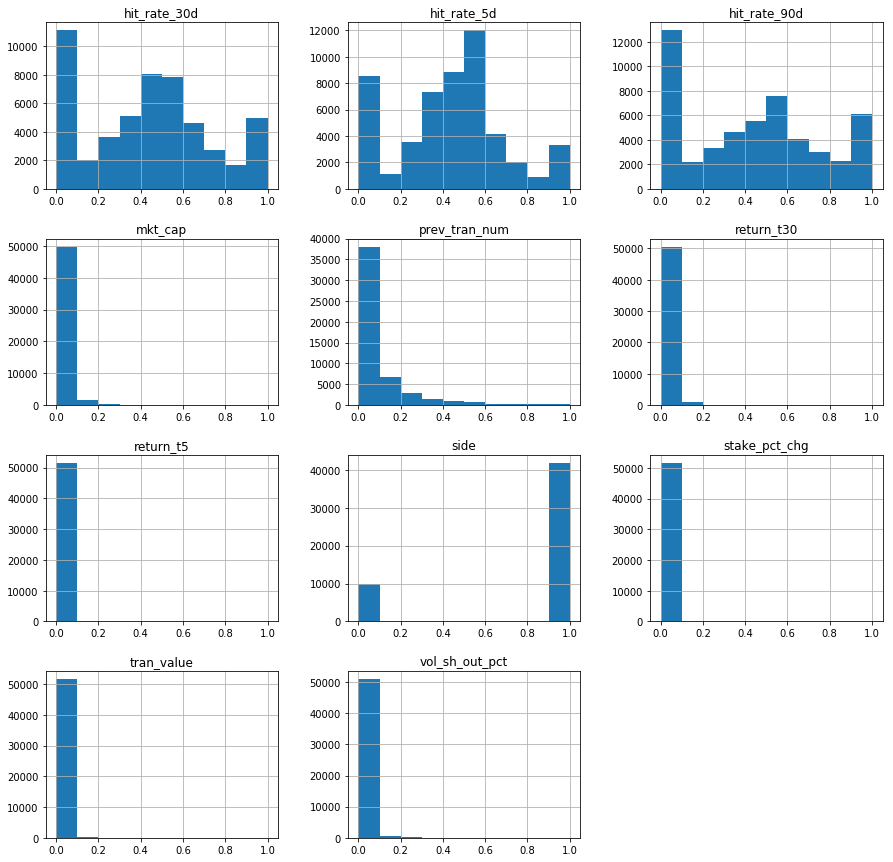

In [12]:
df[col_list].hist(figsize = [15,15])

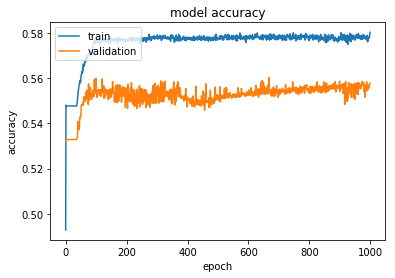

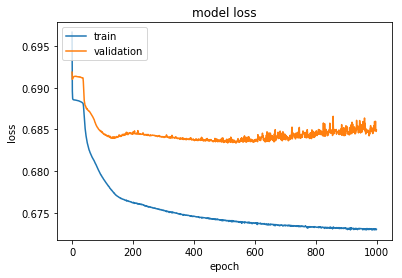

In [13]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
# evaluate the model
scores = model.evaluate(X_train, y_train_5d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_5d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 27us/step
[Train] acc: 57.35%
17240/17240 [==============================] - 0s 27us/step
[Test] acc: 56.74%
